In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split

In [56]:
df=pd.read_csv("new.csv")

In [57]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [59]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [60]:
df.isna()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [61]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

<Axes: xlabel='Gender', ylabel='count'>

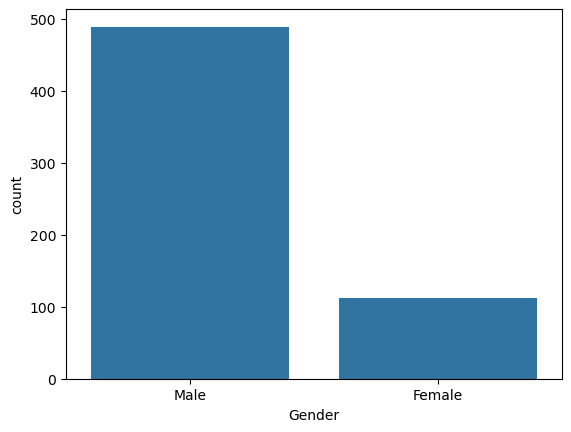

In [62]:
sns.countplot(x=df["Gender"])

In [63]:
df['Gender'].mode()[0]

'Male'

In [64]:
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])

<Axes: xlabel='Married', ylabel='count'>

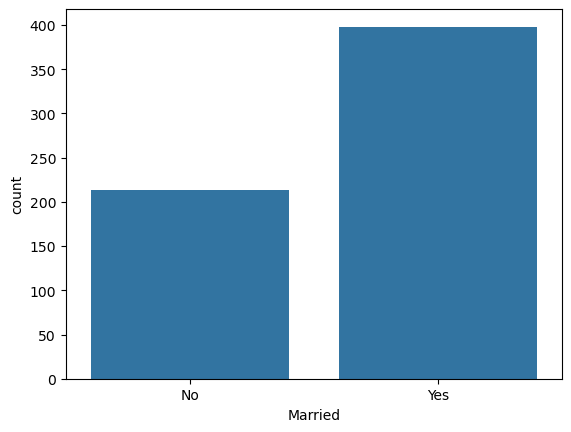

In [65]:
sns.countplot(x=df['Married'])

In [66]:
df['Married'].mode()[0]

'Yes'

In [67]:
df['Married']=df['Married'].fillna(df['Married'].mode()[0])

<Axes: xlabel='Dependents', ylabel='count'>

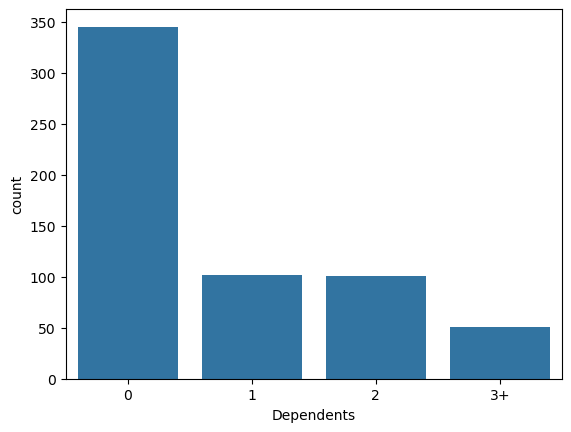

In [68]:
sns.countplot(x=df['Dependents'])

In [69]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [70]:
df['Dependents'].mode()[0]

'0'

In [71]:
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])

<Axes: xlabel='Education', ylabel='count'>

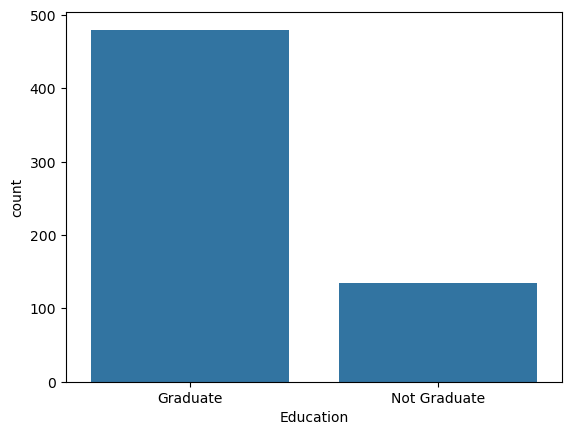

In [72]:
sns.countplot(x=df['Education'])

In [73]:
df['Education'].mode()[0]

'Graduate'

In [74]:
df['Education']=df['Education'].fillna(df['Education'].mode()[0])

<Axes: xlabel='Self_Employed', ylabel='count'>

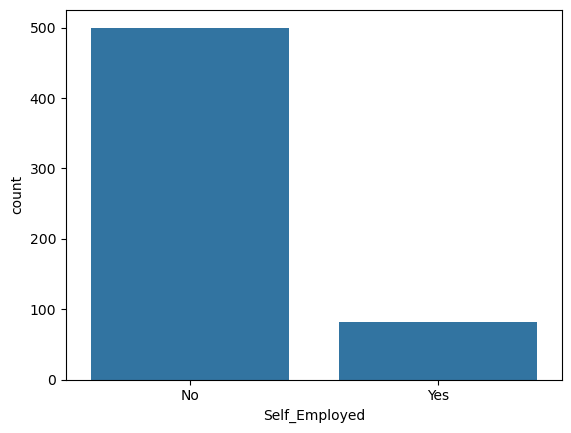

In [75]:
sns.countplot(x=df['Self_Employed'])

In [76]:
df['Self_Employed'].mode()[0]

'No'

In [77]:
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [78]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [79]:
df['LoanAmount'].median()

128.0

In [80]:
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'])

In [81]:
df['Loan_Amount_Term'].median()

360.0

In [82]:
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median())

<Axes: xlabel='Credit_History', ylabel='count'>

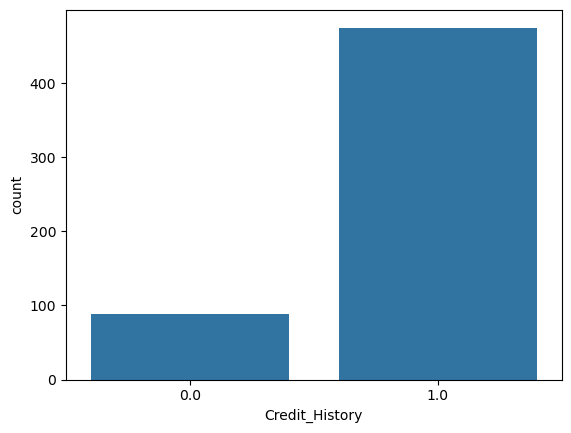

In [83]:
sns.countplot(x=df['Credit_History'])

In [84]:
df['Credit_History'].mode()[0]

1.0

In [85]:
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mode()[0])

In [86]:
df.isna().sum()*100/len(df)

Loan_ID              0.000000
Gender               0.000000
Married              0.000000
Dependents           0.000000
Education            0.000000
Self_Employed        0.000000
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     0.000000
Credit_History       0.000000
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [87]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [97]:
df.replace({
    "Loan_Status":{'N':0,'Y':1},
    "Gender":{'Male':0,'Female':1},
    "Married":{'No':0,'Yes':1},
    "Education":{'Not Graduate':0,'Graduate':1},
    "Self_Employed":{'No':0,'Yes':1}
},inplace=True)


In [98]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,Urban,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,Rural,1
610,LP002979,0,1,3+,1,0,4106,0.0,40.0,180.0,1.0,Rural,1
611,LP002983,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,Urban,1
612,LP002984,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,Urban,1


In [90]:
def train_test_split_and_features(df):
    y = df["Loan_Status"]
    x = df.drop(['Loan_Status', 'Loan_ID'], axis=1)
    x = pd.get_dummies(data=x, columns=["Property_Area", "Dependents"])
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)
    print(x.head(5))
    print(x.columns)
    features = list(x.columns)
    return x_train, x_test, y_train, y_test, features

In [91]:
x_train, x_test, y_train, y_test,features = train_test_split_and_features(df)

   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       0        0          1              0             5849   
1       0        1          1              0             4583   
2       0        1          1              1             3000   
3       0        1          0              0             2583   
4       0        0          1              0             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0         NaN             360.0             1.0   
1             1508.0       128.0             360.0             1.0   
2                0.0        66.0             360.0             1.0   
3             2358.0       120.0             360.0             1.0   
4                0.0       141.0             360.0             1.0   

   Property_Area_Rural  Property_Area_Semiurban  Property_Area_Urban  \
0                False                    False                 True   
1                 True                    Fa

In [92]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
def fit_and_evaluate_model(x_train, x_test, y_train, y_test):
    random_forest =  RandomForestClassifier(random_state=0,\
                                            max_depth=5,\
                                            min_samples_split= 0.01,\
                                            max_features= 0.8,
                                            max_samples= 0.8)

    model = random_forest.fit(x_train, y_train)
    random_forest_predict = random_forest.predict(x_test)
    random_forest_conf_matrix = confusion_matrix(y_test, random_forest_predict)
    random_forest_acc_score = accuracy_score(y_test, random_forest_predict)
    print("confussion matrix")
    print(random_forest_conf_matrix)
    print("\n")
    print("Accuracy of Random Forest:",random_forest_acc_score*100,'\n')
    print(classification_report(y_test,random_forest_predict))
    return model

In [93]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)

confussion matrix
[[14 19]
 [ 4 86]]


Accuracy of Random Forest: 81.30081300813008 

              precision    recall  f1-score   support

           0       0.78      0.42      0.55        33
           1       0.82      0.96      0.88        90

    accuracy                           0.81       123
   macro avg       0.80      0.69      0.72       123
weighted avg       0.81      0.81      0.79       123



In [94]:
importances = pd.DataFrame(model.feature_importances_)
importances['features'] = features
importances.columns = ['importance','feature']
importances.sort_values(by = 'importance', ascending= True,inplace=True)

<BarContainer object of 16 artists>

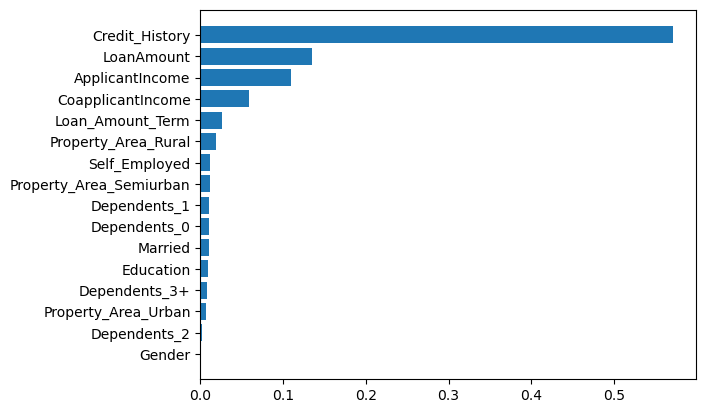

In [95]:
import matplotlib.pyplot as plt
plt.barh(importances.feature, importances.importance)

In [96]:
rf_proba = model.predict_proba(x_test)
rf_predict = model.predict(x_test)
print(rf_proba[0:10])
print(rf_predict)

[[0.19678218 0.80321782]
 [0.14564701 0.85435299]
 [0.48014176 0.51985824]
 [0.16343075 0.83656925]
 [0.08734202 0.91265798]
 [0.75375    0.24625   ]
 [0.23308758 0.76691242]
 [0.35443573 0.64556427]
 [0.8689828  0.1310172 ]
 [0.09948735 0.90051265]]
[1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 0 1
 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 0 1]
